<a href="https://colab.research.google.com/github/william-monroy/mem-estadistics/blob/master/activity2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Activity 2

**Name**: William Frank Monroy Mamani

**ID**: A00829796

**Link to Google Colab file**: https://colab.research.google.com/drive/1AarK2Cc_9vNeow7-NFCcFjIArPEABACe?usp=sharing

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage
import numpy as np
from sklearn.decomposition import PCA

# Problem 1

An equity analyst is studying the pharmaceutical industry to explore and understand the financial data collected by her company. Her goal is to understand the structure of the pharmaceutical industry using some basic financial metrics. The database contains financial data collected from 21 companies. For each company, the following variables were recorded:

* Market capitalization (in billions of dollars) (Market_Cap)
* Beta
* Price-to-earnings ratio (PE_Ratio)
* Return on equity (ROE)
* Return on assets (ROA)
* Asset turnover (Asset_Turnover)
* Leverage
* Estimated revenue growth (Rev_Growth)
* Net profit margin (Net_Profit_Margin)
* Median recommendation (among major exchanges) (Median_Recommendation)
* Location of the company's headquarters (Location)
* Stock exchange on which the company is listed. (Exchange)

In this activity, the predictors to be used are: Market_Cap, Beta, PE_Ratio, ROE, ROA, Asset_Turnover, Leverage, Rev_Growth, and Net_Profit_Margin.

Considering the database in the Pharmaceuticals.xlsx file, answer the questiojs below.

## Question 1

A) Apply the **K-means algorithm** to detect 3 groups of observations using Market_Cap and Rev_Growth.

In [6]:
data = pd.read_excel('Pharmaceuticals.xlsx')
observations = data.filter(['Market_Cap', 'Rev_Growth'])

scaler = StandardScaler()
Xs_data = scaler.fit_transform(observations)

kmeans = KMeans(n_clusters = 3, random_state = 301655)
clusters = kmeans.fit_predict(Xs_data)

clustered_data = (observations
              .assign(Cluster = clusters)
              )
clustered_data

,Market_Cap,Rev_Growth,Cluster
0,68.44,7.54,0
1,7.58,9.16,0
2,6.30,7.05,0
3,67.63,15.00,0
4,47.16,26.81,1
5,16.90,-3.17,0
6,51.33,2.70,0
7,0.41,6.38,0
8,0.78,34.21,1
9,73.84,6.21,0


B) Create a plot to visualize the groups using the Market_Cap and Rev_Growth variables. That is, the vertical and horitontal axes must show Market_Cap and Rev_Growth, respectively. Color the points according to the groups.

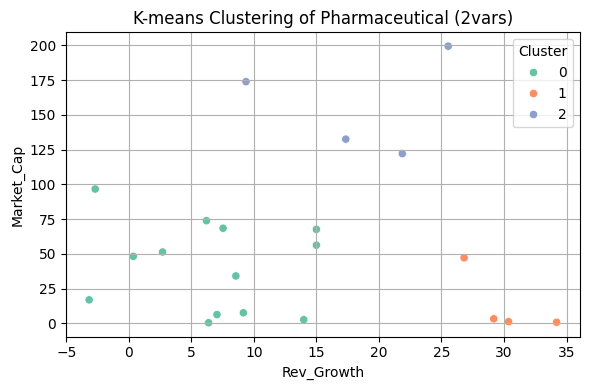

In [5]:
plt.figure(figsize=(6, 4))
sns.scatterplot(data = clustered_data, y = 'Market_Cap', x = 'Rev_Growth',
                hue = 'Cluster', palette = 'Set2')
plt.title('K-means Clustering of Pharmaceutical (2vars)')
plt.ylabel('Market_Cap')
plt.xlabel('Rev_Growth')
plt.tight_layout()
plt.grid(True)
plt.show()

C) Interpret the plot in B). Specifically, comment on whether the three groups of groups tend to have different values in terms of market capitalization and revenue growth.

En el grafico se evidencia que el cluster 2 tiene valores mas dispersos entre si que los clusters 0 y 1; ademas que tienen un mayor Market Cap que los otros.

Y de los clusters 0 y 1 se puede ver que el cluster 1 tiene un outlier notorio respecto del cluster 0. Y ambos tienen un valor por debajo de 100.

## Question 2

A) Determine the best number of groups to use according to **K-means algorithm** using *all* predictors. That is, find the best value of *K*.

In [6]:
data.info()

<class 'pandas.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Symbol                 21 non-null     str    
 1   Name                   21 non-null     str    
 2   Market_Cap             21 non-null     float64
 3   Beta                   21 non-null     float64
 4   PE_Ratio               21 non-null     float64
 5   ROE                    21 non-null     float64
 6   ROA                    21 non-null     float64
 7   Asset_Turnover         21 non-null     float64
 8   Leverage               21 non-null     float64
 9   Rev_Growth             21 non-null     float64
 10  Net_Profit_Margin      21 non-null     float64
 11  Median_Recommendation  21 non-null     str    
 12  Location               21 non-null     str    
 13  Exchange               21 non-null     str    
dtypes: float64(9), str(5)
memory usage: 2.4 KB


In [7]:
X_predictors = data.filter(['Market_Cap', 'Beta', 'PE_Ratio', 'ROE', 'ROA', 'Asset_Turnover', 'Leverage', 'Rev_Growth', 'Net_Profit_Margin' ])
X_predictors

,Market_Cap,Beta,PE_Ratio,ROE,ROA,Asset_Turnover,Leverage,Rev_Growth,Net_Profit_Margin
0,68.44,0.32,24.7,26.4,11.8,0.7,0.42,7.54,16.1
1,7.58,0.41,82.5,12.9,5.5,0.9,0.60,9.16,5.5
2,6.30,0.46,20.7,14.9,7.8,0.9,0.27,7.05,11.2
3,67.63,0.52,21.5,27.4,15.4,0.9,0.00,15.00,18.0
4,47.16,0.32,20.1,21.8,7.5,0.6,0.34,26.81,12.9
5,16.90,1.11,27.9,3.9,1.4,0.6,0.00,-3.17,2.6
6,51.33,0.50,13.9,34.8,15.1,0.9,0.57,2.70,20.6
7,0.41,0.85,26.0,24.1,4.3,0.6,3.51,6.38,7.5
8,0.78,1.08,3.6,15.1,5.1,0.3,1.07,34.21,13.3
9,73.84,0.18,27.9,31.0,13.5,0.6,0.53,6.21,23.4


In [8]:
scaler = StandardScaler()
Xs_predictors = scaler.fit_transform(X_predictors)
Xs_predictors

array([[ 1.88642282e-01, -8.21040576e-01, -4.78668159e-02,
         4.10803822e-02,  2.47578717e-01, -5.24754233e-16,
        -2.17335702e-01, -5.40800775e-01,  6.32054993e-02],
       [-8.75518007e-01, -4.61835324e-01,  3.58342950e+00,
        -8.75950197e-01, -9.65556995e-01,  9.45313187e-01,
         1.87358364e-02, -3.90551348e-01, -1.59203499e+00],
       [-8.97899295e-01, -2.62276851e-01, -2.99167599e-01,
        -7.40093815e-01, -5.22666180e-01,  9.45313187e-01,
        -4.14061984e-01, -5.86246589e-01, -7.01952839e-01],
       [ 1.74479124e-01, -2.28066827e-02, -2.48907443e-01,
         1.09008573e-01,  9.40799124e-01,  9.45313187e-01,
        -7.68169291e-01,  1.51088563e-01,  3.59899549e-01],
       [-1.83446626e-01, -8.21040576e-01, -3.36862717e-01,
        -2.71389297e-01, -5.80434547e-01, -4.72656593e-01,
        -3.22256386e-01,  1.24642544e+00, -4.36489742e-01],
       [-7.12554256e-01,  2.33198330e+00,  1.53173811e-01,
        -1.48730392e+00, -1.75505801e+00, -4.726565

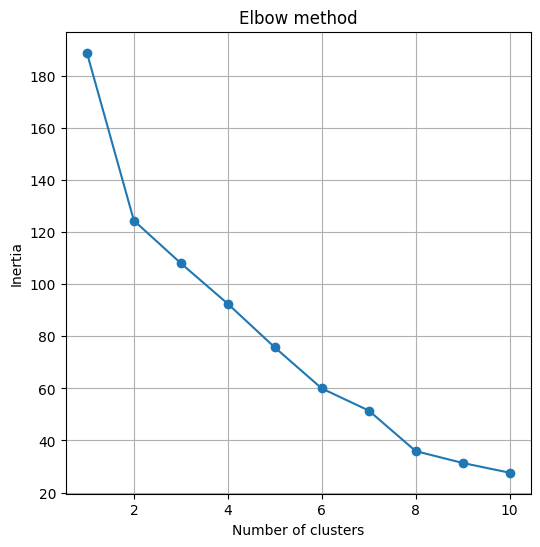

In [9]:
inertias = [] # List to save interia values.
k_max = 11 # Maximum number of clusters to try.

for i in range(1,k_max):
    kmeans = KMeans(n_clusters=i, random_state=301655)
    kmeans.fit(Xs_predictors)
    inertias.append(kmeans.inertia_)

plt.figure(figsize=(6, 6))
plt.plot(range(1,k_max), inertias, marker='o')
plt.title('Elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.grid(True)
plt.show()

**Respuesta:** Según la curva del método del codo, la inflexión más marcada aparece alrededor de **K = 2**. A partir de ese punto, la inercia sigue disminuyendo, pero a un ritmo menor, por lo que **2 clústeres** es el valor más defendible bajo el criterio del codo.

B) Using the **K-means algorithm** and the best value of *K*, create a table showing the observations that belong to each group.

In [29]:
# Se usa el mejor K detectado con el método del codo (K = 2)
kmeans = KMeans(n_clusters=2, random_state=301655)
clusters_all_predictors = kmeans.fit_predict(Xs_predictors)

data_with_clusters = data.copy()
data_with_clusters['Cluster'] = clusters_all_predictors + 1

data_with_clusters[['Symbol', 'Name', 'Cluster']].sort_values('Cluster').reset_index(drop=True)

,Symbol,Name,Cluster
0,ABT,Abbott Laboratories,1
1,AZN,AstraZeneca PLC,1
2,BMY,Bristol-Myers Squibb Company,1
3,NVS,Novartis AG,1
4,JNJ,Johnson & Johnson,1
5,MRK,"Merck & Co., Inc.",1
6,GSK,GlaxoSmithKline plc,1
7,LLY,Eli Lilly and Company,1
8,SGP,Schering-Plough Corporation,1
9,WYE,Wyeth,1


### Question 3

A) Apply the **hierarchical clustering technique** with a "Complete" linkage to detect 6 groups of observations.

In [9]:
from scipy.cluster.hierarchy import fcluster

# 1) Matriz de enlace jerárquico con criterio Complete
linked = linkage(Xs_predictors, method='complete', metric='euclidean')

# 2) Cortamos el dendrograma para obtener exactamente 6 grupos
hierarchical_clusters = fcluster(linked, t=6, criterion='maxclust')

data_hierarchical = data.copy()
data_hierarchical['Hierarchical_Cluster'] = hierarchical_clusters

data_hierarchical[['Symbol', 'Name', 'Hierarchical_Cluster']].sort_values('Hierarchical_Cluster')

,Symbol,Name,Hierarchical_Cluster
0,ABT,Abbott Laboratories,1
9,LLY,Eli Lilly and Company,1
15,NVS,Novartis AG,1
20,WYE,Wyeth,1
10,GSK,GlaxoSmithKline plc,2
12,JNJ,Johnson & Johnson,2
6,BMY,Bristol-Myers Squibb Company,2
3,AZN,AstraZeneca PLC,2
16,PFE,Pfizer Inc,2
18,SGP,Schering-Plough Corporation,2


B) Display the dendrogram obtained using the previous clustering technique.

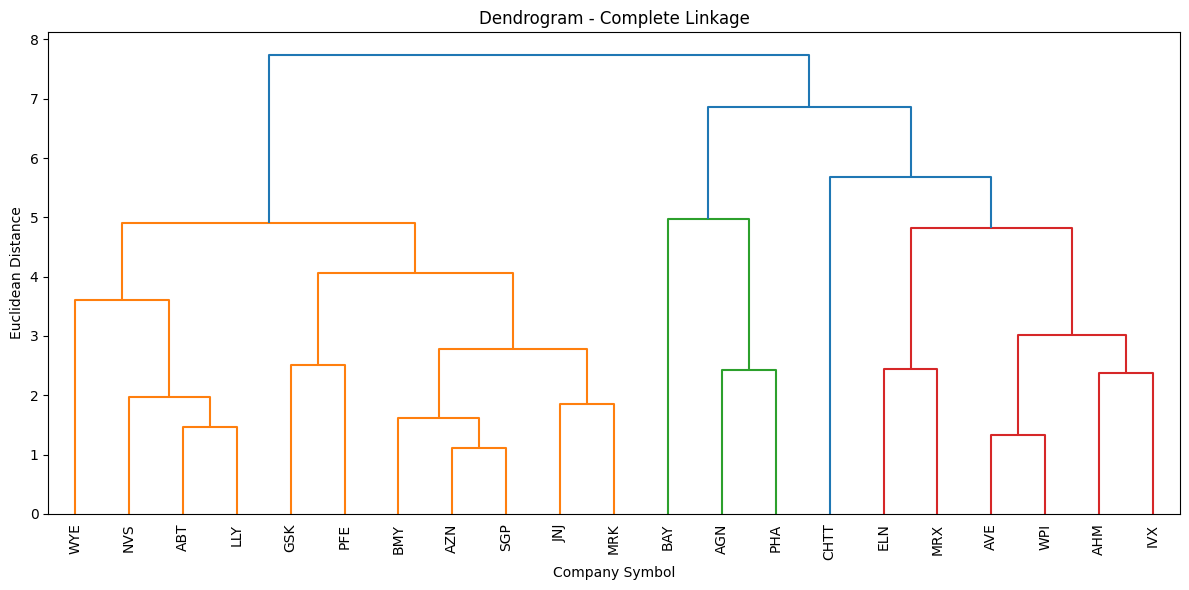

In [31]:
plt.figure(figsize=(12, 6))
dendrogram(linked, labels=data['Symbol'].values, leaf_rotation=90)
plt.title('Dendrogram - Complete Linkage')
plt.xlabel('Company Symbol')
plt.ylabel('Euclidean Distance')
plt.tight_layout()
plt.show()

## Question 4

Using the grouping from Question 3, create a table showing the observations that belong to each group.

In [32]:
groups_table = (
    data_hierarchical[['Symbol', 'Name', 'Hierarchical_Cluster']]
    .sort_values(['Hierarchical_Cluster', 'Symbol'])
    .reset_index(drop=True)
)
groups_table

,Symbol,Name,Hierarchical_Cluster
0,ABT,Abbott Laboratories,1
1,LLY,Eli Lilly and Company,1
2,NVS,Novartis AG,1
3,WYE,Wyeth,1
4,AZN,AstraZeneca PLC,2
5,BMY,Bristol-Myers Squibb Company,2
6,GSK,GlaxoSmithKline plc,2
7,JNJ,Johnson & Johnson,2
8,MRK,"Merck & Co., Inc.",2
9,PFE,Pfizer Inc,2


## Question 5

A) For each group created in Question 3, calculate the average value of the Market_Cap, PE_Ratio, and ROA predictors for each group. That is, calculate the average value of Market_Cap for the companies in group 1.

In [33]:
group_1_averages = (
    data_hierarchical[data_hierarchical['Hierarchical_Cluster'] == 1][['Market_Cap', 'PE_Ratio', 'ROA']]
    .mean()
    .to_frame(name='Group_1_Mean')
    .T
    .round(2)
)
group_1_averages

,Market_Cap,PE_Ratio,ROA
Group_1_Mean,71.78,21.82,12.48


B) Do the same for groups 2, 3, 4, 5, and 6.

In [34]:
groups_2_to_6_averages = (
    data_hierarchical[data_hierarchical['Hierarchical_Cluster'].isin([2, 3, 4, 5, 6])]
    .groupby('Hierarchical_Cluster')[['Market_Cap', 'PE_Ratio', 'ROA']]
    .mean()
    .round(2)
)
groups_2_to_6_averages

,Market_Cap,PE_Ratio,ROA
Hierarchical_Cluster,,,
2,111.59,20.46,16.37
3,31.91,69.50,5.60
4,16.90,27.90,1.40
5,10.22,18.55,6.57
6,0.41,26.00,4.30


C) Repeat this entire procedure for the PE_Ratio and ROA predictors.

In [10]:
group_means_all = (
    data_hierarchical
    .groupby('Hierarchical_Cluster')[['Market_Cap', 'PE_Ratio', 'ROA']]
    .mean()
    .round(2)
)
group_means_all

,Market_Cap,PE_Ratio,ROA
Hierarchical_Cluster,,,
1,71.78,21.82,12.48
2,111.59,20.46,16.37
3,31.91,69.50,5.60
4,16.90,27.90,1.40
5,10.22,18.55,6.57
6,0.41,26.00,4.30


D) Comment on the performance of the pharmaceutical groups in terms of the average values of the Market_Cap, PE_Ratio, and ROA indicators. Justify your answer.

**Answer:**

De acuerdo con los promedios por grupo:

- **Grupo 2** presenta el mejor perfil global: mayor tamaño promedio (**Market_Cap = 111.59**) y mayor eficiencia operativa (**ROA = 16.37**), con un **PE_Ratio = 20.46** moderado.
- **Grupo 1** también muestra desempeño sólido (**Market_Cap = 71.78**, **ROA = 12.48**) y valuación intermedia (**PE_Ratio = 21.82**).
- **Grupo 3** destaca por el **PE_Ratio más alto (69.50)** pero con **ROA bajo (5.60)**, lo que sugiere expectativas de mercado elevadas respecto al desempeño actual.
- **Grupos 4, 5 y 6** concentran empresas de menor escala y menor rentabilidad (especialmente **Grupo 4**, con **ROA = 1.40**, y **Grupo 6**, con **Market_Cap = 0.41**).

En síntesis, los grupos 1 y 2 muestran mejor desempeño financiero promedio, mientras que los demás reflejan menor tamaño, menor rentabilidad o valuaciones menos balanceadas.

# Problem 2

The "Colleges_Reduced.xlsx" data file in Canvas contains a selection of public and private colleges in the U.S. that offer bachelor's degree programs. The data includes the name of the college, its state, and whether the school is public or private (Public (1)/Private (2)). Additionally, it has data on the following predictors:

* Number of applications received (# appli. rec'd)
* Number of applications accepted (# appl. accepted)
* Number of students enrolled (# new stud. enrolled)
* Number of full-time students (# FT undergrad)
* Number of part-time students (# PT undergrad)
* In-state tuition
* Out-of-state tuition
* Estimated personal cost per month for a student (estimated personal $)
* Percentage of faculty with PhDs (% fac. w/PHD)
* Student-faculty ratio (stud./fac. ratio)
* Percentage of students who graduate (Graduation rate)

Using the database, answer the following questions.

## Question 1

A) Apply the principal components analysis using all predictors excluding university name, state, and whether the university is public or private.

In [11]:
colleges = pd.read_excel('Colleges_Reduced.xlsx')

# Excluimos nombre, estado y tipo público/privado (primeras 3 columnas)
colleges_predictors = colleges.iloc[:, 3:].copy()

scaler_colleges = StandardScaler()
Xs_colleges = scaler_colleges.fit_transform(colleges_predictors)

pca = PCA()
pca_scores = pca.fit_transform(Xs_colleges)

explained_variance = pd.DataFrame({
    'PC': [f'PC{i+1}' for i in range(len(pca.explained_variance_ratio_))],
    'Explained_Variance_Ratio': pca.explained_variance_ratio_,
    'Cumulative_Explained_Variance': np.cumsum(pca.explained_variance_ratio_)
})
explained_variance

,PC,Explained_Variance_Ratio,Cumulative_Explained_Variance
0,PC1,0.412705,0.412705
1,PC2,0.268129,0.680834
2,PC3,0.084897,0.765731
3,PC4,0.066343,0.832074
4,PC5,0.057598,0.889672
5,PC6,0.044124,0.933795
6,PC7,0.037517,0.971313
7,PC8,0.016568,0.987881
8,PC9,0.004592,0.992473
9,PC10,0.004203,0.996677


B) How many principal components are needed to explain 60% of the dispersion in the data? Justify your answer using tables displayed by the software and, if possible, formulas shown in the slides.

In [12]:
components_60 = np.argmax(np.cumsum(pca.explained_variance_ratio_) >= 0.60) + 1
components_60

np.int64(2)

**Answer:**

Se necesitan **2 componentes principales** para explicar al menos el 60% de la dispersión total.

La tabla de PCA muestra:

- Varianza explicada por **PC1**: 0.412705 (41.27%)
- Varianza explicada por **PC2**: 0.268129 (26.81%)
- Varianza acumulada con **PC1 + PC2**: **0.680834 (68.08%)**

Como \(0.680834 > 0.60\), con dos componentes se supera el umbral solicitado.

C) Construct a bi-plot in terms of the first two principal components

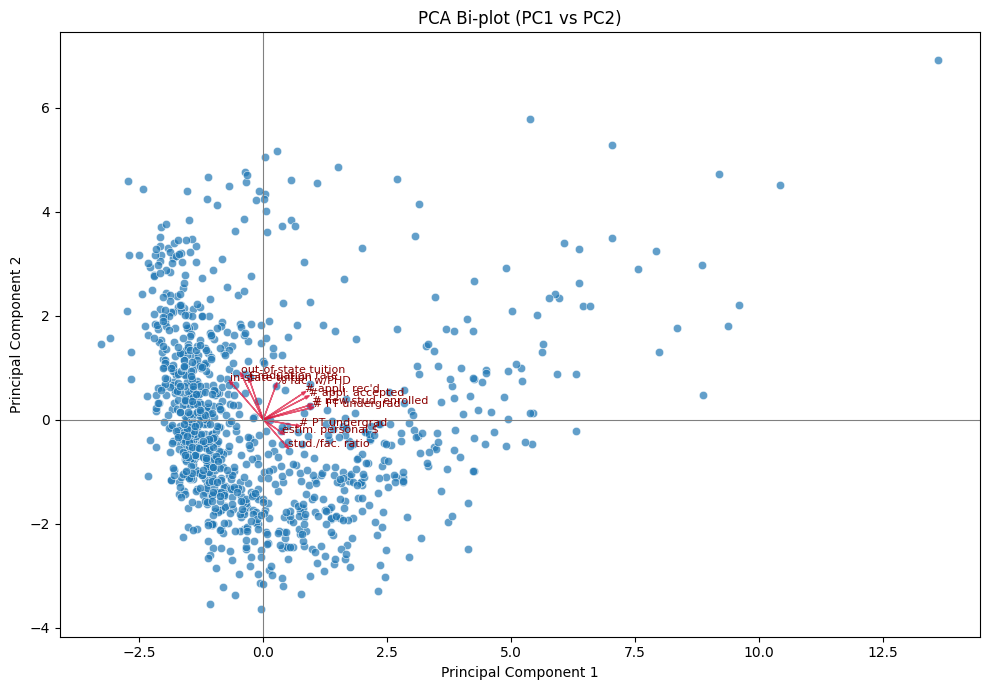

In [38]:
pc_df = pd.DataFrame(pca_scores[:, :2], columns=['PC1', 'PC2'])

plt.figure(figsize=(10, 7))
sns.scatterplot(data=pc_df, x='PC1', y='PC2', alpha=0.7)

# Cargas (loadings) para biplot en PC1-PC2
loadings = pca.components_.T * np.sqrt(pca.explained_variance_)
arrow_scale = 1.0

for i, variable in enumerate(colleges_predictors.columns):
    plt.arrow(
        0, 0,
        loadings[i, 0] * arrow_scale,
        loadings[i, 1] * arrow_scale,
        color='crimson', alpha=0.7, head_width=0.06
    )
    plt.text(
        loadings[i, 0] * arrow_scale * 1.08,
        loadings[i, 1] * arrow_scale * 1.08,
        variable,
        color='darkred', fontsize=8
    )

plt.axhline(0, color='gray', linewidth=0.8)
plt.axvline(0, color='gray', linewidth=0.8)
plt.title('PCA Bi-plot (PC1 vs PC2)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.tight_layout()
plt.show()

In [ ]:
# Autor: wimodev | Exportar ipynb->PDF en Colab

#@title Exportar Google Notebook a PDF
#@markdown Ajusta los parámetros y ejecuta la celda.

#@markdown ### 1) Notebook de entrada
ipynb_path = "/content/drive/MyDrive/Colab Notebooks/Activity2.ipynb" #@param {type:"string"}

#@markdown ### 2) Carpeta de salida
output_dir = "/content" #@param {type:"string"}

#@markdown ### 3) Opcional
output_name = "" #@param {type:"string"}  # deja vacío para usar el nombre por defecto

import subprocess
from google.colab import drive

subprocess.run(
    "apt-get install -y texlive-xetex texlive-latex-extra texlive-plain-generic "
    "texlive-fonts-recommended pandoc",
    shell=True, check=True
)
subprocess.run("pip install pypandoc", shell=True, check=True)

drive.mount("/content/drive")

cmd = f'jupyter nbconvert --to pdf "{ipynb_path}" --output-dir "{output_dir}"'
if output_name.strip():
    cmd += f' --output "{output_name.strip()}"'

subprocess.run(cmd, shell=True, check=True)

print("\nListo. Revisa el PDF en:", output_dir)


CalledProcessError: Command 'apt-get install -y texlive-xetex texlive-latex-extra texlive-plain-generic texlive-fonts-recommended pandoc' returned non-zero exit status 100.